# Fire forest Detection

### Load libraries

In [1]:

import tensorflow as tf
import pathlib #
import os
import numpy  # linear algebra
import pandas  # data processing
import PIL
import cv2
import glob

import matplotlib.pyplot as plt
import seaborn 
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
# Load dataset
fire_image ='/Users/alanoudabdulaziz/Desktop/Data/Train_Data/Fire'
non_fire_image ="/Users/alanoudabdulaziz/Desktop/Data/Train_Data/Non_Fire"
fire_image_path = pathlib.Path(fire_image)
non_fire_path = pathlib.Path(non_fire_image)

## Image preprocess 

In [3]:
train_data_images = {
    "Fire":list(fire_image_path.glob("*.jpg")),
    "NonFire":list(non_fire_path.glob("*.jpg"))
}
train_labels = {
    "Fire":0,"NonFire":1
}

In [5]:
X, y = [], []
for label, images in train_data_images.items():
    for image in images:
        img = cv2.imread(str(image)) # Reading the image
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (180, 180))
            X.append(img)
            y.append(train_labels[label])

In [6]:
import numpy
X_samp = numpy.array(X)
y_samp = numpy.array(y)

In [7]:
X_samp = (X_samp/255)


In [8]:
X_samp[0].shape


(180, 180, 3)

## split the Data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.2)

In [10]:
data_argumentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomContrast(0.3),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.5)
])

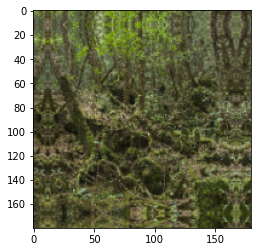

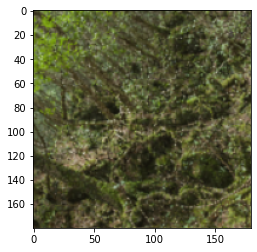

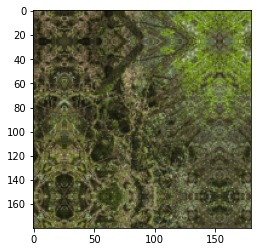

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


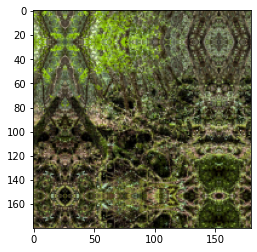

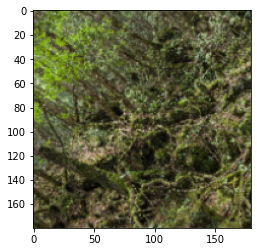

In [11]:
for i in range(5):
    plt.imshow(data_argumentation(X_train[0]))
    plt.show()

## MODEL

In [12]:
model = keras.Sequential([
    data_argumentation,
    keras.layers.Conv2D(64, (3,3), padding='same', activation="relu", input_shape=(180, 180, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, (3,3), padding='same', activation="softmax"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, (3,3), padding='same', activation="softmax"),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="sigmoid"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
116/116 [==============================] - 171s 1s/step - loss: 0.5813 - accuracy: 0.6808
Epoch 2/50
116/116 [==============================] - 116s 1s/step - loss: 0.3457 - accuracy: 0.8660
Epoch 3/50
116/116 [==============================] - 116s 1s/step - loss: 0.3032 - accuracy: 0.8885
Epoch 4/50
116/116 [==============================] - 116s 1000ms/step - loss: 0.3109 - accuracy: 0.8839
Epoch 5/50
116/116 [==============================] - 113s 978ms/step - loss: 0.2785 - accuracy: 0.8977
Epoch 6/50
116/116 [==============================] - 114s 982ms/step - loss: 0.2632 - accuracy: 0.9021
Epoch 7/50
116/116 [==============================] - 113s 970ms/step - loss: 0.2588 - accuracy: 0.9072
Epoch 8/50
116/116 [==============================] - 113s 978ms/step - loss: 0.2491 - accuracy: 0.9083
Epoch 9/50
116/116 [==============================] - 113s 971ms/step - loss: 0.2444 - accuracy: 0.9081
Epoch 10/50
116/116 [==============================] - 113s 976ms/step -

In [13]:
model.evaluate(X_test, y_test)


29/29 [==============================] - 6s 204ms/step - loss: 0.1550 - accuracy: 0.9458


[0.1550271362066269, 0.9457700848579407]

In [14]:
test_fire = "/Users/alanoudabdulaziz/Desktop/Data/Test_Data/Fire"
test_non_fire = "/Users/alanoudabdulaziz/Desktop/Data/Test_Data/Non_Fire"
test_fire = pathlib.Path(test_fire)
test_non_fire = pathlib.Path(test_non_fire)

In [15]:
test = {
    "Fire":list(test_fire.glob("*.jpg")),
    "NonFire":list(test_non_fire.glob("*.jpg"))
}

In [16]:
test_array = []
for label, images in test.items():
    for image in images:
        img = cv2.imread(str(image)) # Reading the test image
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (180, 180))
            test_array.append(img)
test_array = numpy.array(test_array)

## predict

In [17]:
test_array = test_array/ 255
pred = model.predict(test_array)

In [18]:
preds = pred.round(decimals=0).flatten()
results = []
for i in preds:
    if i==0:
        results.append("Fire")
    elif i == 1:
        results.append("Non Fire")

In [19]:
fire = 0
nonFire = 0
for i in results:
    if i=="Fire":
        fire += 1
    else:
        nonFire += 1
print(fire, "Fire images out of ", 25)
print(nonFire , 'Non fire images out of', 25)

27 Fire images out of  25
23 Non fire images out of 25


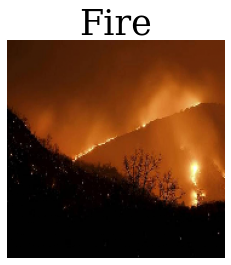

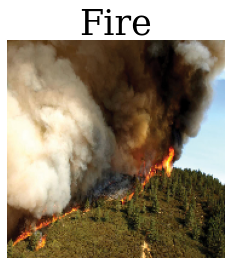

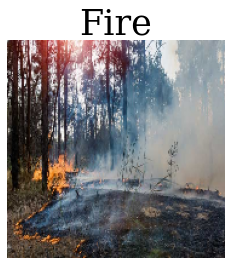

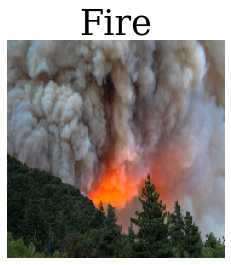

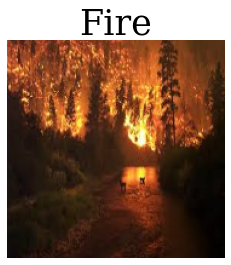

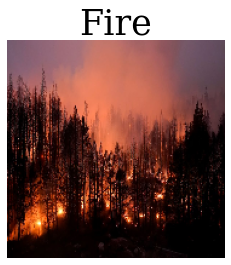

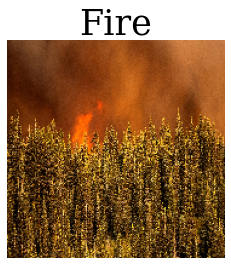

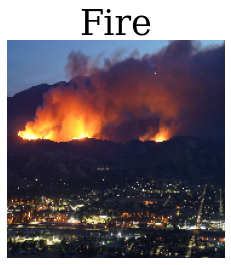

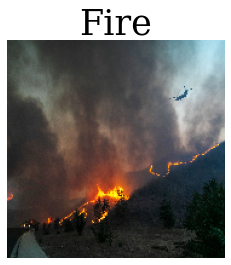

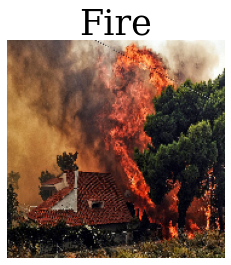

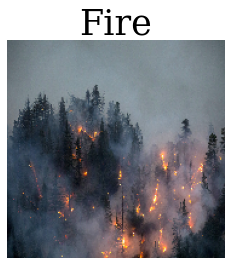

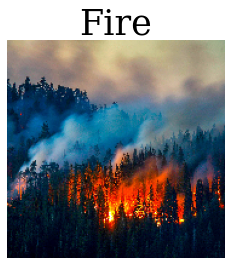

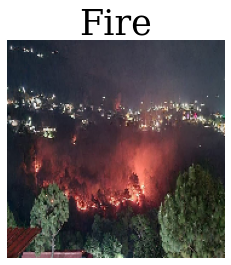

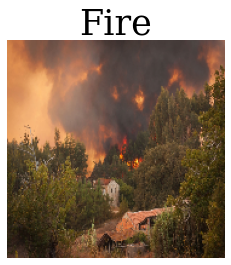

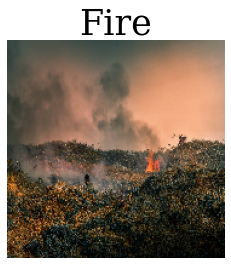

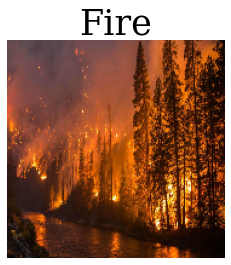

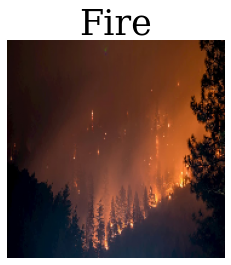

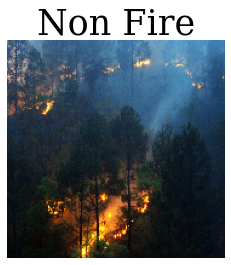

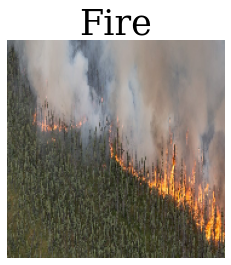

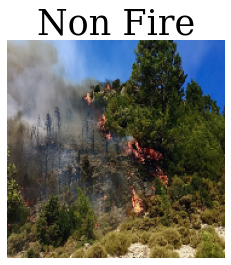

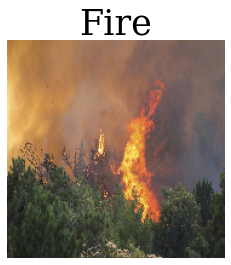

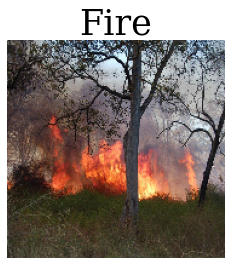

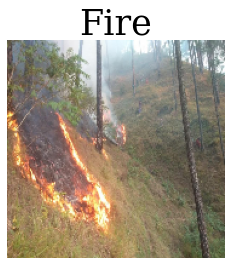

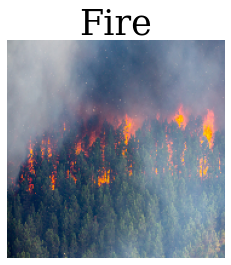

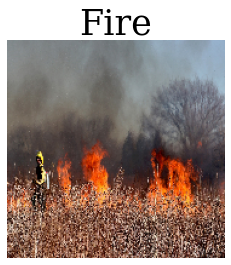

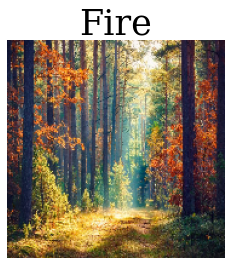

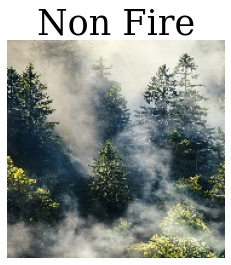

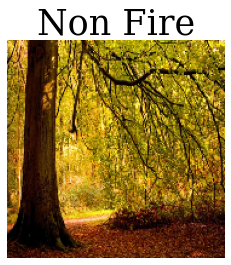

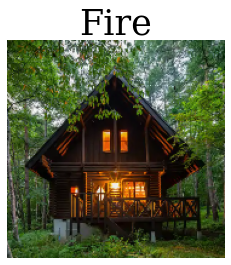

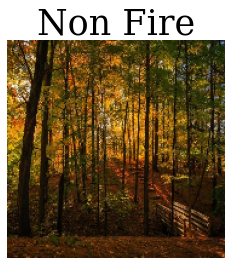

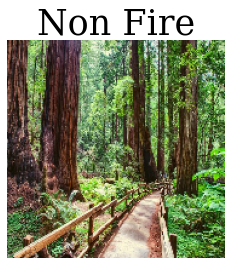

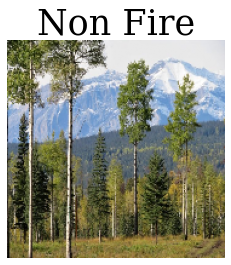

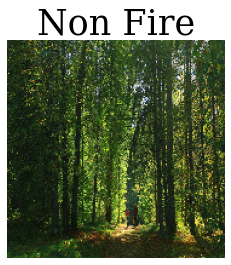

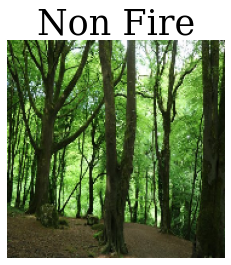

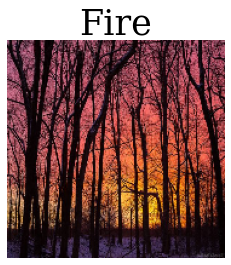

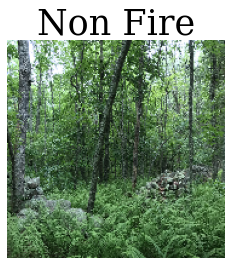

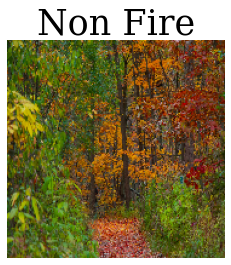

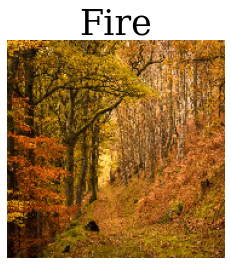

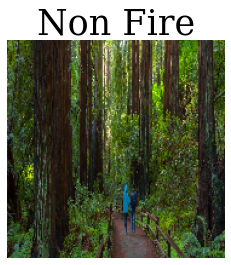

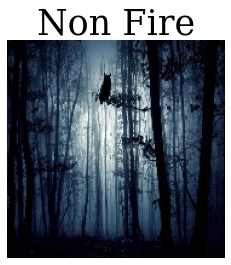

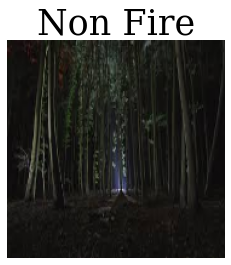

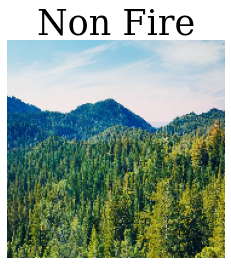

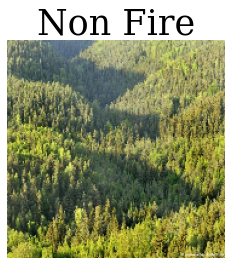

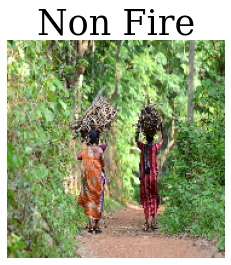

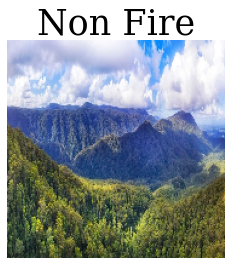

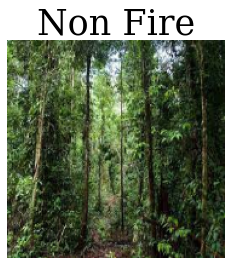

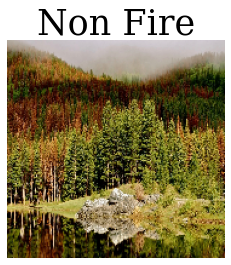

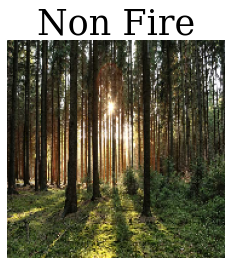

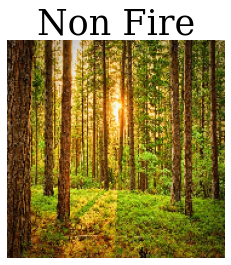

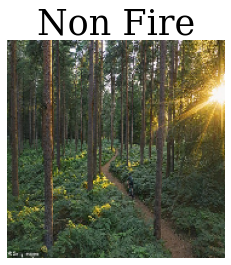

In [20]:
font1 = {'family':'serif','color':'black','size':30} 
for i in range(50):
    plt.imshow(test_array[i])
    plt.title(results[i], fontdict=font1)
    plt.axis('off')
    plt.show()

## save the model

In [21]:
model.save("fire_model.h5")